# Датасеты для примера:

[Heart Failure Prediction Dataset - классификация, ансамбли решающих деревьев](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

[House Prices - Advanced Regression Techniques - регрессия](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [33]:
import pandas as pd
import numpy as np

# Загрузка датасета

In [34]:
df = pd.read_csv('train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Построение гистограммы распределения целевой переменной

Text(0, 0.5, 'SalePrice')

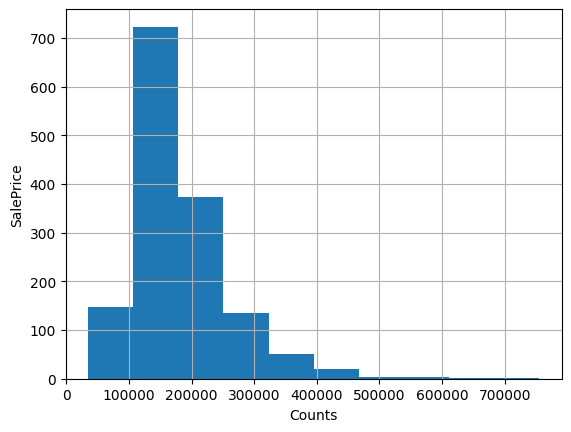

In [35]:
ax = df['SalePrice'].hist()
ax.set_xlabel('Counts')
ax.set_ylabel('SalePrice')

# Проверка значений nan

In [36]:
print(df.isnull().sum().sum())

df = df.fillna(0)

print(df.isnull().sum().sum())

6965
0


# Загрузка датасета

In [37]:
df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Проверка сбалансированности

In [38]:
for i in df['HeartDisease'].unique():
    print(f'Class {i}: {df["HeartDisease"].value_counts()[i]}')

Class 0: 410
Class 1: 508


# Кодирование качественных признаков

In [39]:
new_df = pd.get_dummies(df)
new_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [40]:
new_df = df.copy()

for i in df:
    if 'float' not in str(df[i]) and 'int' not in str(df[i]):
        numeric_feature = pd.get_dummies(df[i])
        new_df[i] = np.argmax(numeric_feature.to_numpy(), 1)

new_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Нормализация

Вариант 1: так, чтобы все признаки принимали значения в диапазоне $[0;1]$, используя преобразование $X^{*}=(X-X_{min})/{\Delta{X}}$ для каждого признака. Вариант 2: так, чтобы все признаки принимали значения в диапазоне $[-3\sigma;+3\sigma]$, используя преобразование $X^{*}=(X-\mu_{X})/{\sigma_{X}}$ для каждого признака.

In [41]:
df.std()

<ipython-input-41-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

In [42]:
def normalization(df):
    return (df - df.mean()) / df.std()

X_norm = normalization(new_df.drop('HeartDisease', axis = 1))
Y = new_df.HeartDisease

display(X_norm.head())
display(Y.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,0.515671,0.228907,0.410685,0.824621,-0.551041,0.017245,1.382175,-0.823108,-0.831979,1.051541
1,-0.478223,-1.937107,1.274364,1.490940,-0.171867,-0.551041,0.017245,0.753746,-0.823108,0.105606,-0.595753
2,-1.750404,0.515671,0.228907,-0.129442,0.769768,-0.551041,1.600347,-1.524307,-0.823108,-0.831979,1.051541
3,-0.584238,-1.937107,-0.816550,0.302660,0.138964,-0.551041,0.017245,-1.131539,1.213585,0.574398,-0.595753
4,0.051853,0.515671,1.274364,0.950812,-0.034736,-0.551041,0.017245,-0.581664,-0.823108,-0.831979,1.051541


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

# Предварительный анализ датасета

Расчитать средние показатели признаков для каждого класса (или для всего датасета в случае решения задачи регрессии)(Использовать ненормализованные данные количественных признаков)

In [43]:
# Пример

df = pd.read_csv('heart.csv')

age_0 = df['Age'][Y == 0].mean()
age_1 = df['Age'][Y == 1].mean()

print(f'mean age for class 0: {age_0:.2f}')
print(f'mean age for class 1: {age_1:.2f}')

mean age for class 0: 50.55
mean age for class 1: 55.90


Расчитать частоту качественных признаков для каждого класса (или для всего датасета в случае решения задачи регрессии)

In [44]:
# Пример

df = pd.read_csv('heart.csv')

for i in df['RestingECG'].unique():
    print(f'Class 0: RestingECG {i}: {df["RestingECG"][Y == 0].value_counts()[i]}')
    print(f'Class 1: RestingECG {i}: {df["RestingECG"][Y == 1].value_counts()[i]}')

Class 0: RestingECG Normal: 267
Class 1: RestingECG Normal: 285
Class 0: RestingECG ST: 61
Class 1: RestingECG ST: 117
Class 0: RestingECG LVH: 82
Class 1: RestingECG LVH: 106
